In [1]:
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

## Prius

In [2]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['PRIUS']

col = collection.find()
df = pd.DataFrame(list(col))

In [4]:
a = df[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000

years = a['model_year'].unique()
years.sort()
med = []
for y in years:
    m = a[a['model_year']==y].median()
    med.append(m['base_price'])


<Figure size 432x288 with 0 Axes>

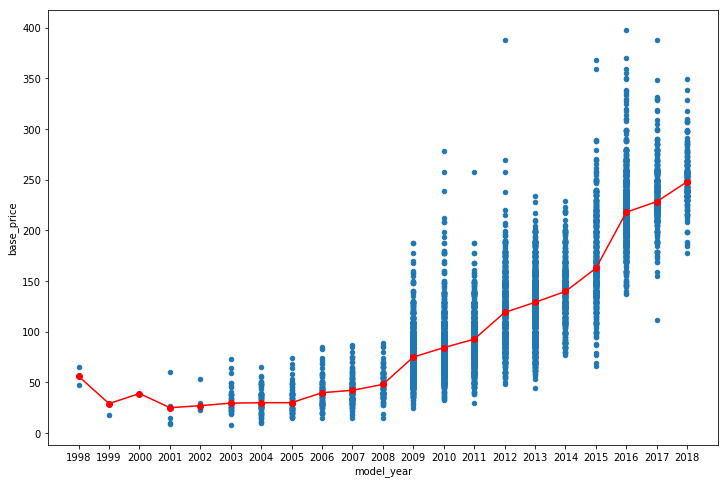

In [5]:
plt.figure()
b = pd.Series(med, index=years)
ax = a.plot(kind='scatter', x='model_year', y='base_price', xticks=years, figsize=(12, 8))
b.plot(marker='o', color='red', ax=ax)
# plt.savefig('year_price.png')

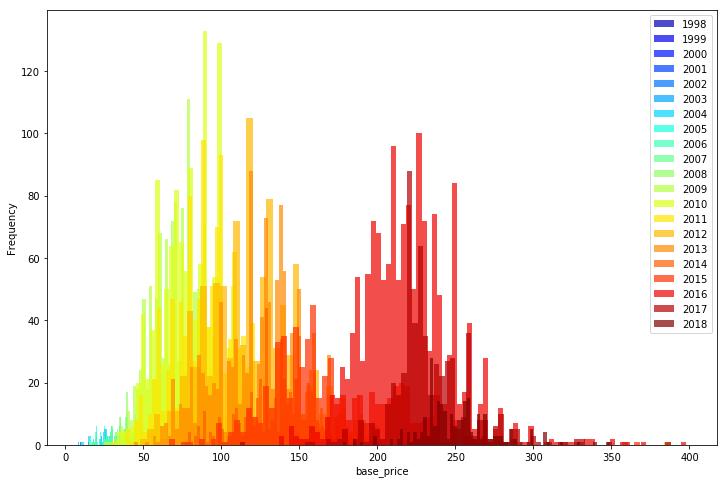

In [6]:
num_models = len(df['model_year'].unique())
cmap = plt.get_cmap('jet')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for (i, (key, group)) in enumerate(df.groupby('model_year')):
    (group['base_price']/10000).plot(kind='hist', ax=ax, alpha=0.7, bins=80, label=key, color=colors[i])
    ax.legend()
    ax.set_xlabel('base_price')
# fig.savefig('base_price_hist.png')

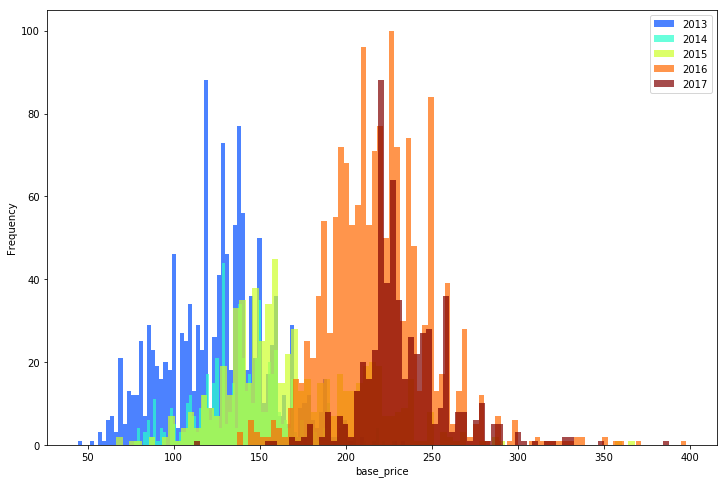

In [7]:
cmap = plt.get_cmap('jet')
colors = [cmap(c / float(5)) for c in np.arange(1, 5 + 1)]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
j = 0
for (i, (key, group)) in enumerate(df.groupby('model_year')):
    if key > 2012 and key < 2018:
        (group['base_price']/10000).plot(kind='hist', ax=ax, alpha=0.7, bins=80, color=colors[j], label=key)
        ax.legend()
        ax.set_xlabel('base_price')
        j += 1
# fig.savefig('base_price_hist2.png')

1998 2
1999 3
2000 1
2001 7
2002 4
2003 40
2004 85
2005 76
2006 104
2007 146
2008 125
2009 1375
2010 1370
2011 1147
2012 1002
2013 1289
2014 577
2015 644
2016 1501
2017 562
2018 244


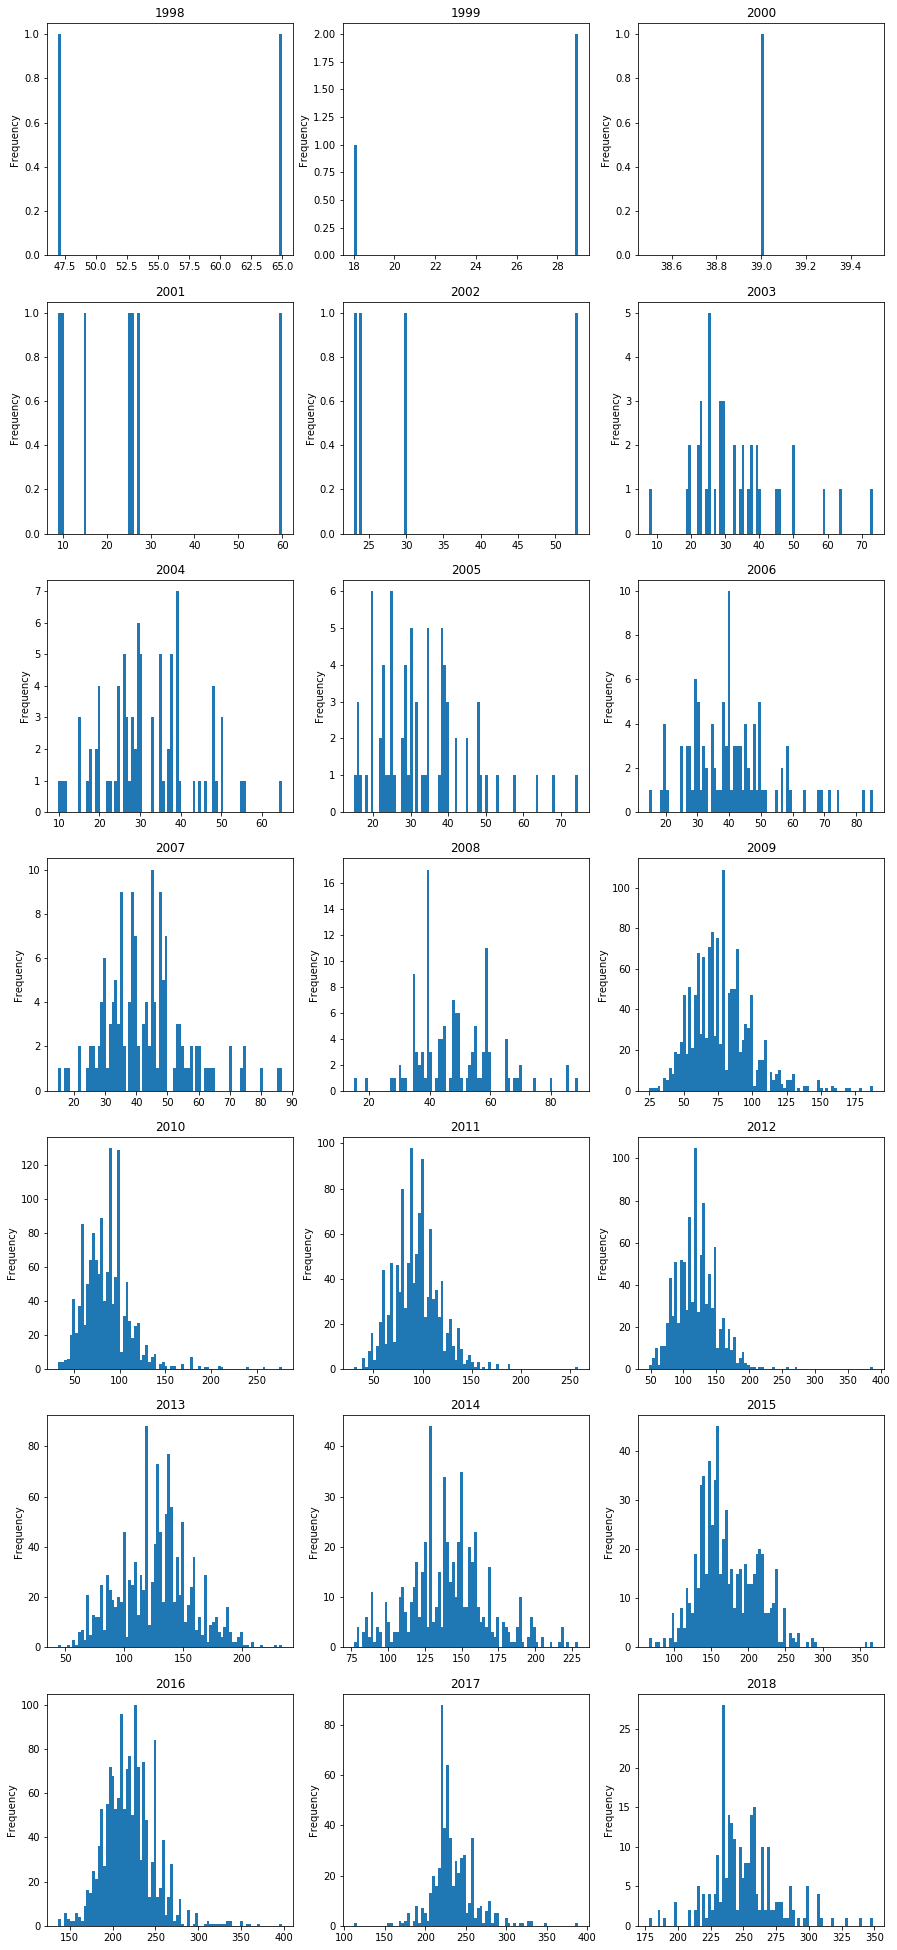

In [8]:
a = df[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())
a['base_price'] /= 10000

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    ax = group['base_price'].plot.hist(ax=ax, bins=80)
    ax.set_title(key)
# plt.savefig('dist.png')

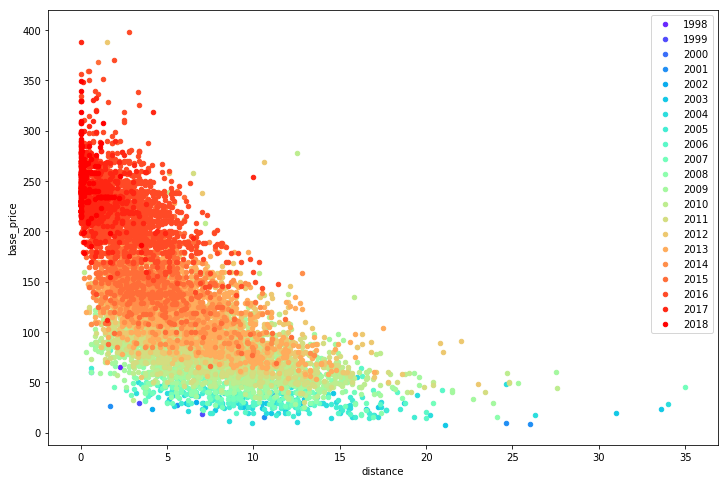

In [9]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('dist_price.png')

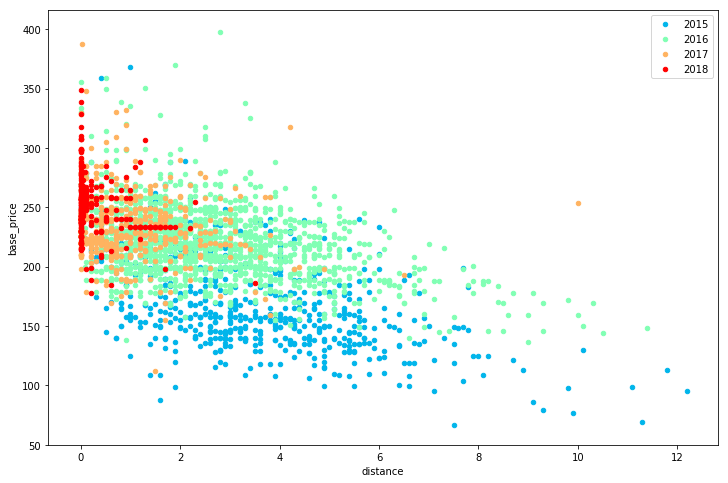

In [10]:
b = a[a['model_year'] > 2014]
b = b[b['model_year'] < 2019]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 4) for c in np.arange(1, 5)]
ax = fig.add_subplot(1, 1, 1)
# ax.set_xlim([-2, 37])
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('18-15.png')

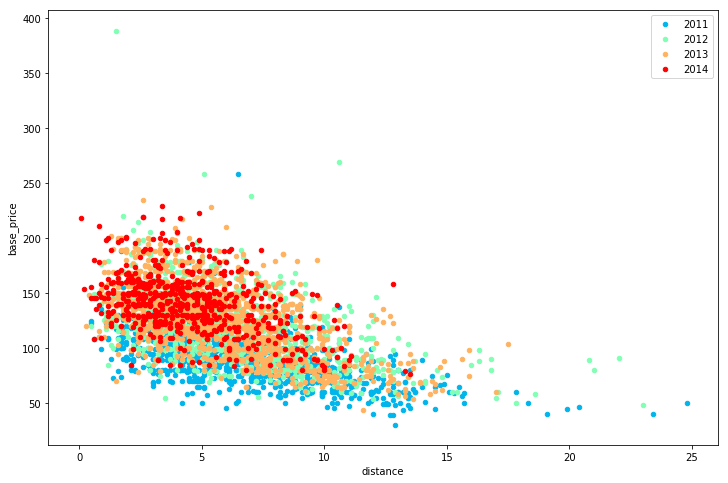

In [11]:
b = a[a['model_year'] > 2010]
b = b[b['model_year'] < 2015]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 4) for c in np.arange(1, 5)]
ax = fig.add_subplot(1, 1, 1)
# ax.set_xlim([-2, 37])
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('15-11.png')

## Fit

In [2]:
client = MongoClient()
db = client['CARSENSOR']
collection = db['FIT']

col = collection.find()
df = pd.DataFrame(list(col))

In [3]:
a = df[['base_price', 'distance', 'model_year']].dropna()
a['base_price'] /= 10000

years = a['model_year'].unique()
years.sort()
med = []
for y in years:
    m = a[a['model_year']==y].median()
    med.append(m['base_price'])

<Figure size 432x288 with 0 Axes>

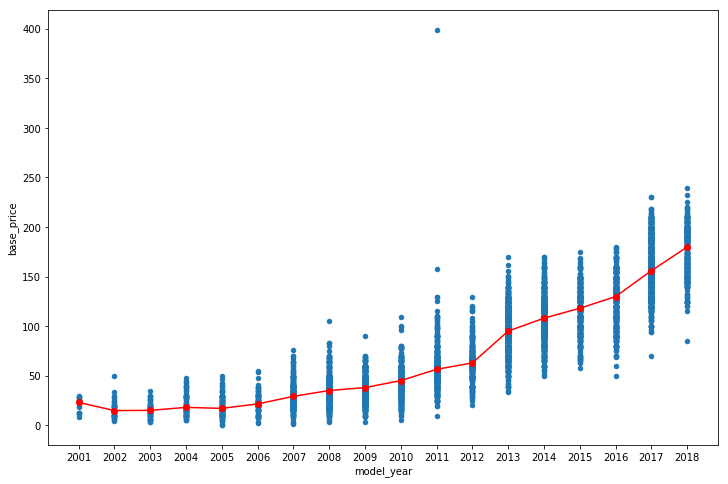

In [4]:
plt.figure()
b = pd.Series(med, index=years)
ax = a.plot(kind='scatter', x='model_year', y='base_price', xticks=years, figsize=(12, 8))
b.plot(marker='o', color='red', ax=ax)
# plt.savefig('year_price.png')

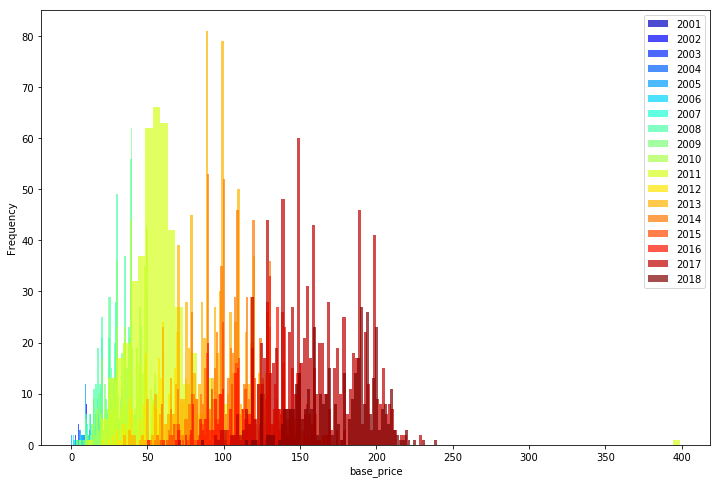

In [5]:
num_models = len(df['model_year'].unique())
cmap = plt.get_cmap('jet')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for (i, (key, group)) in enumerate(df.groupby('model_year')):
    (group['base_price']/10000).plot(kind='hist', ax=ax, alpha=0.7, bins=80, label=key, color=colors[i])
    ax.legend()
    ax.set_xlabel('base_price')
# fig.savefig('base_price_hist.png')


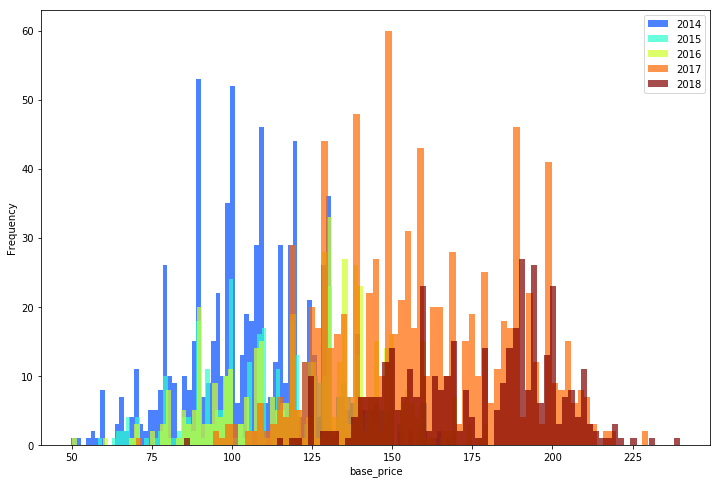

In [8]:
cmap = plt.get_cmap('jet')
colors = [cmap(c / float(5)) for c in np.arange(1, 5 + 1)]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
j = 0
for (i, (key, group)) in enumerate(df.groupby('model_year')):
    if key > 2013 and key < 2019:
        (group['base_price']/10000).plot(kind='hist', ax=ax, alpha=0.7, bins=80, color=colors[j], label=key)
        ax.legend()
        ax.set_xlabel('base_price')
        j += 1
# fig.savefig('base_price_hist2.png')

2001 17
2002 41
2003 61
2004 82
2005 115
2006 84
2007 314
2008 550
2009 580
2010 464
2011 459
2012 294
2013 915
2014 816
2015 391
2016 472
2017 922
2018 401


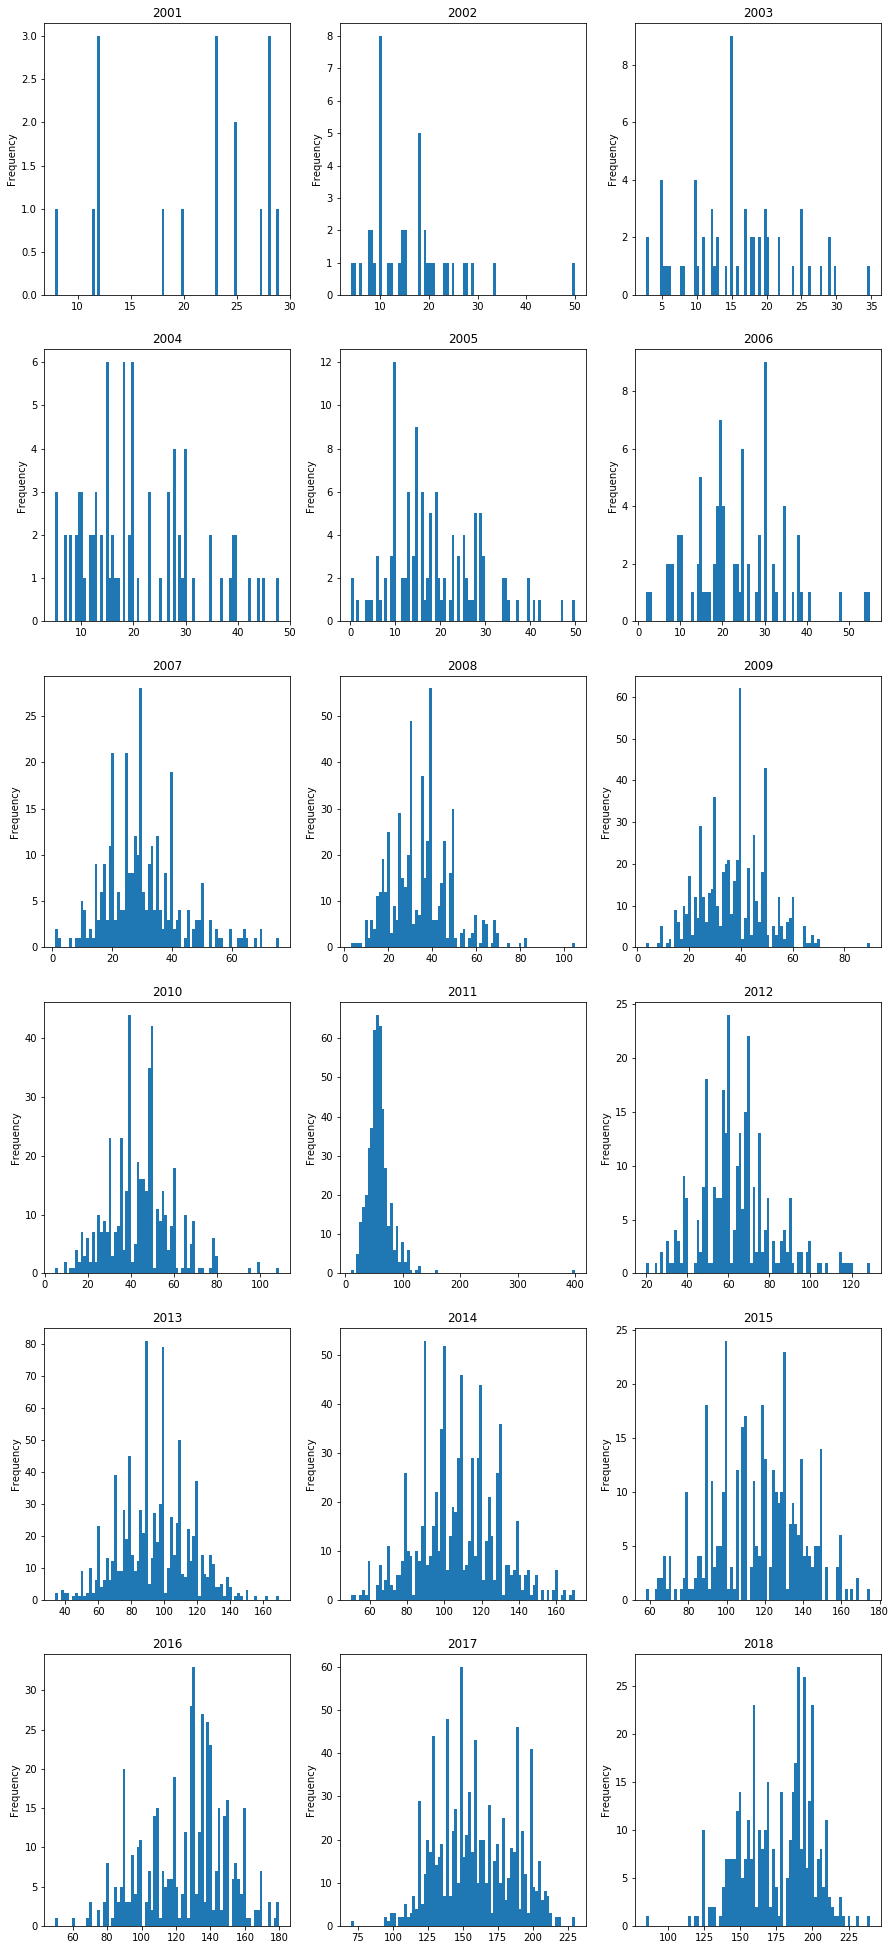

In [9]:
a = df[['base_price', 'distance', 'model_year']].dropna()
# grouped = a.groupby('model_year')
num_models = len(a['model_year'].unique())
a['base_price'] /= 10000

fig, axes = plt.subplots(math.ceil(num_models / 3), 3, figsize=(15, 35))
for (ax, (key, group)) in zip(axes.flatten(), a.groupby('model_year')):
    print(key, len(group))
    ax = group['base_price'].plot.hist(ax=ax, bins=80)
    ax.set_title(key)
# plt.savefig('dist.png')

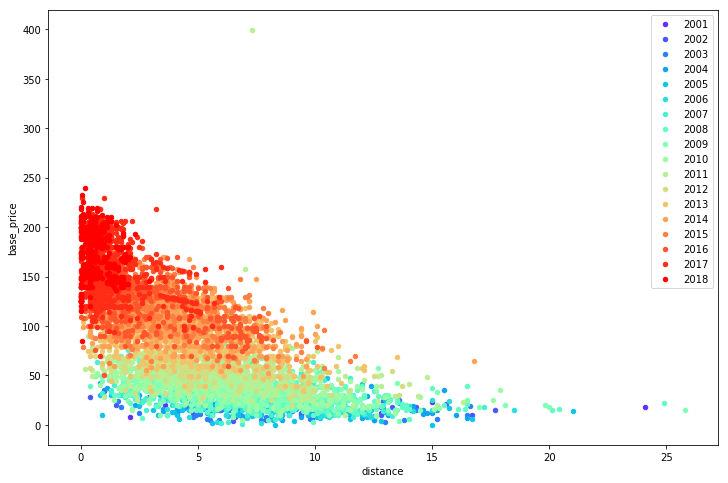

In [10]:
fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / float(num_models)) for c in np.arange(1, num_models + 1)]
ax = fig.add_subplot(1, 1, 1)
for (i, (key, group)) in enumerate(a.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('dist_price.png')

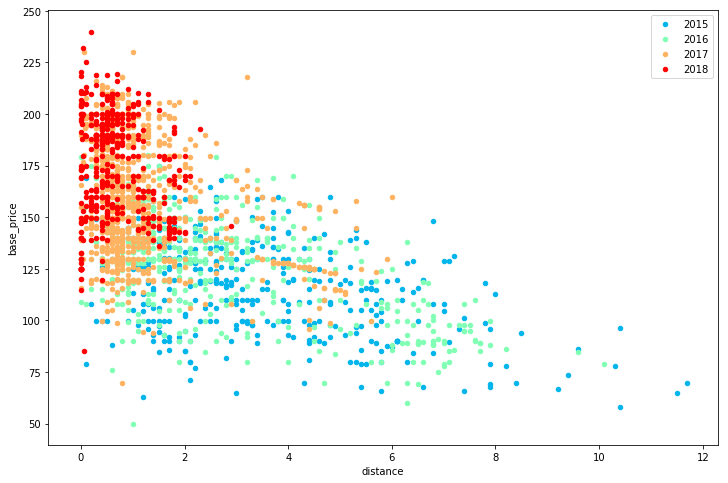

In [11]:
b = a[a['model_year'] > 2014]
b = b[b['model_year'] < 2019]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 4) for c in np.arange(1, 5)]
ax = fig.add_subplot(1, 1, 1)
# ax.set_xlim([-2, 37])
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('18-15.png')

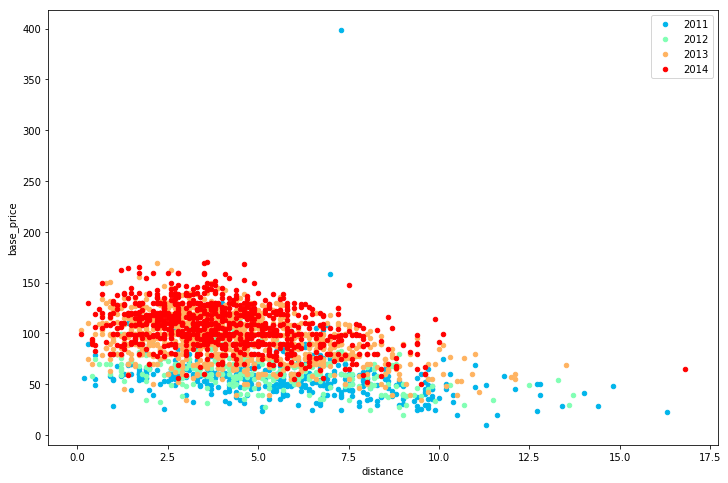

In [12]:
b = a[a['model_year'] > 2010]
b = b[b['model_year'] < 2015]

fig = plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('rainbow')
colors = [cmap(c / 4) for c in np.arange(1, 5)]
ax = fig.add_subplot(1, 1, 1)
# ax.set_xlim([-2, 37])
for (i, (key, group)) in enumerate(b.groupby('model_year')):
    group.plot.scatter(x='distance', y='base_price', ax=ax, color=colors[i], label=key)
# plt.savefig('15-11.png')